# Linear Regression Model From Stratch
Training Data on Custom-Built Linear Regression Model

In [2]:
from sklearn.datasets._samples_generator import make_regression #to generate sample data
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

## Generating Sample Data

In [3]:
#Data Size Variables
num_entries = 250
sample_test_size = .2
m = int(num_entries * (1-sample_test_size))

#Create train and test data
X, y = make_regression(n_samples=num_entries, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sample_test_size, random_state=42)

print(X_train, y_train)

[[-0.8225842 ]
 [-0.04667467]
 [-0.16056362]
 [-0.41238072]
 [-0.05358755]
 [ 1.91171178]
 [ 0.71187915]
 [ 0.60437586]
 [-1.0844555 ]
 [ 0.0673945 ]
 [-0.22134672]
 [-0.68652344]
 [-1.4016353 ]
 [ 0.25737463]
 [ 0.66552946]
 [ 0.2630036 ]
 [ 1.26843893]
 [ 0.75272929]
 [ 0.01007315]
 [ 0.0204526 ]
 [-0.48716582]
 [ 0.2376315 ]
 [-0.21495011]
 [-1.05723508]
 [-0.29594898]
 [ 0.04974017]
 [ 0.47725678]
 [ 0.52518578]
 [ 0.6438291 ]
 [ 2.47053186]
 [ 0.49022774]
 [-1.52007408]
 [-0.52967163]
 [-0.07992433]
 [ 1.11773591]
 [-0.01471103]
 [ 0.03181006]
 [-1.07824164]
 [-0.35644507]
 [-0.24088278]
 [ 1.82304317]
 [-0.04241359]
 [ 0.21853781]
 [-0.52612687]
 [-0.15125239]
 [ 0.59205971]
 [ 0.75911579]
 [ 0.64311606]
 [ 0.49985347]
 [-1.76498398]
 [-0.94861729]
 [-0.21351859]
 [ 0.2674604 ]
 [-0.43224009]
 [-0.11879521]
 [-0.73603076]
 [ 0.26655566]
 [ 0.83175166]
 [-0.25665373]
 [-0.03143433]
 [-1.56145563]
 [ 0.55370177]
 [ 1.38609443]
 [-0.46698477]
 [ 0.69049189]
 [ 0.79200593]
 [-1.95027

## Visualize Data

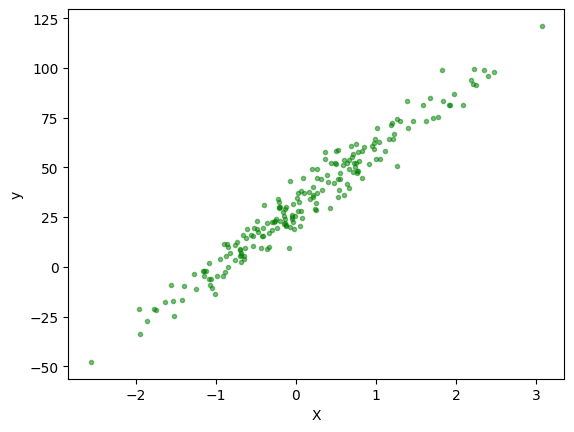

In [4]:
plt.scatter(X_train, y_train, c = "green", alpha=.5, marker='.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Create Model w/ NumPy

## Linear Model (equation)

In [5]:
#Linear equation (vectorized format) = w1x1 + w0
#Returns array of predicted y values
def h(X,w):
    return (w[1]*np.array(X[:,0])+w[0])

## Cost Function

In [6]:
#Returns Mean Squared Error
def cost(w, X, y):
    return (.5/m) * np.sum(np.square(h(X,w)-np.array(y)))

## Gradient Descent

In [7]:
#Returns array of gradients (derivatives of cost function) in respect to each weight/parameter
def grad(w, X, y):
    g = [0]*2 #Initialize array of weights
    g[0] = (1/m) * np.sum(h(X,w) - np.array(y))
    g[1] = (1/m) * np.sum((h(X,w) - np.array(y)) * np.array(X[:,0]))
    return g

In [8]:
def descent(w_new, lr): #lr = learning rate
    j=0 #number of iterations

    while True:
        #update weight values
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X_train, y_train)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X_train, y_train)[1]
        w_new = [w0,w1]
        print("Weights: w1 = {}, w0 = {}".format(w1, w0),
               "| Cost Function Value: {}".format(cost(w_new, X_train, y_train)))

        #stopping conditions
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 <= pow(10, -6): #error threshold = 1e-6
            return w_new
        if j>500: #max iterations
            return w_new
        j+=1

## Initialize Parameters

In [9]:
#Initialize weights/parameters
w = [0, -1]

## Train Model

In [10]:
w = descent(w, .1)

Weights: w1 = 2.4737410250692804, w0 = 3.406433117887263 | Cost Function Value: 841.239477104371
Weights: w1 = 5.555077028560371, w0 = 6.4256025831913615 | Cost Function Value: 665.6834963768764
Weights: w1 = 8.288368392203235, w0 = 9.101501145654488 | Cost Function Value: 527.6602257868634
Weights: w1 = 10.71295780379403, w0 = 11.47312692877948 | Cost Function Value: 419.1453396460066
Weights: w1 = 12.863738067365007, w0 = 13.575050233858748 | Cost Function Value: 333.83009046703125
Weights: w1 = 14.771655637528745, w0 = 15.437916043140564 | Cost Function Value: 266.75452099327987
Weights: w1 = 16.464157155852426, w0 = 17.0888895148512 | Cost Function Value: 214.01909529234848
Weights: w1 = 17.965585442895723, w0 = 18.552050935844964 | Cost Function Value: 172.55798290155334
Weights: w1 = 19.297530668681386, w0 = 19.848745864464185 | Cost Function Value: 139.96081459981693
Weights: w1 = 20.479141776285267, w0 = 20.997895546128845 | Cost Function Value: 114.33254657822582
Weights: w1 =

## Plot model/line

In [11]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

29.774878999200535 x + 29.92879720993438


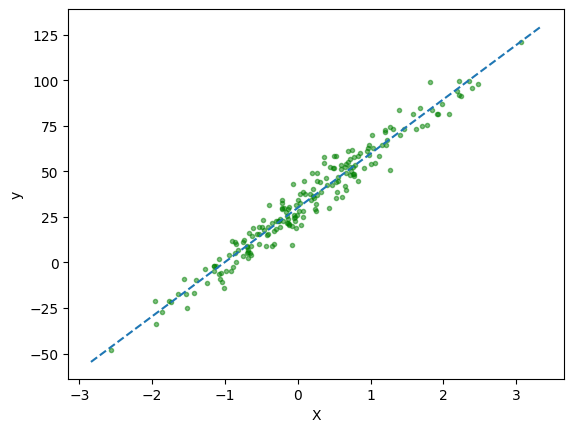

In [12]:
plt.scatter(X_train, y_train, c = "green", alpha=.5, marker='.')
plt.xlabel("X")
plt.ylabel("y")
print(w[1], 'x +', w[0])
abline(w[1], w[0])
plt.show()

# Evaluate Model

In [17]:
y_pred_test = w[1]*X_test + w[0]
y_pred_train = w[1]*X_train + w[0]
rmse_train = root_mean_squared_error(y_train, y_pred_train)
std_train = np.std(y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
std_test = np.std(y_pred_test) #No laughing

print("RMSE (train):", rmse_train)
print("STD (train):", std_train)

print("RMSE (test):", rmse_test)
print("STD (test):", std_test)


#Check if model fits well (RMSE less than half the standard deviation)
if rmse_test < std_test * .5 and rmse_train < std_train * .5:
    print("Model performs well!")
else:
    print("Model not fitting well. Reevaluate!")

RMSE (train): 6.33737155743838
STD (train): 29.47582416877496
RMSE (test): 5.939901490524779
STD (test): 29.801996672286155
Model performs well!
